In [ ]:
import keras
try:
    from keras.utils import to_categorical
except:
    from tensorflow.keras.utils import to_categorical
    
from keras.datasets import mnist
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np
import PIL

In [ ]:
# Função auxiliar para ver uma grid de imagens
# Recebe uma lista de imagens, os labels possíveis e um offset, para começar a mostrar as imagens a partir de um certo índice
def showImages(images, labels, offset=0):
    class_names = [str(i) for i in range(10)]

    fig = plt.figure(figsize=(10, 10))
    for i in range(30):
        plt.subplot(5, 6, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i + offset], cmap="gray")
        plt.xlabel(class_names[int(labels[i + offset])])

    fig.patch.set_facecolor('w')
    plt.show()

# Classificação de Digitos usando uma CNN

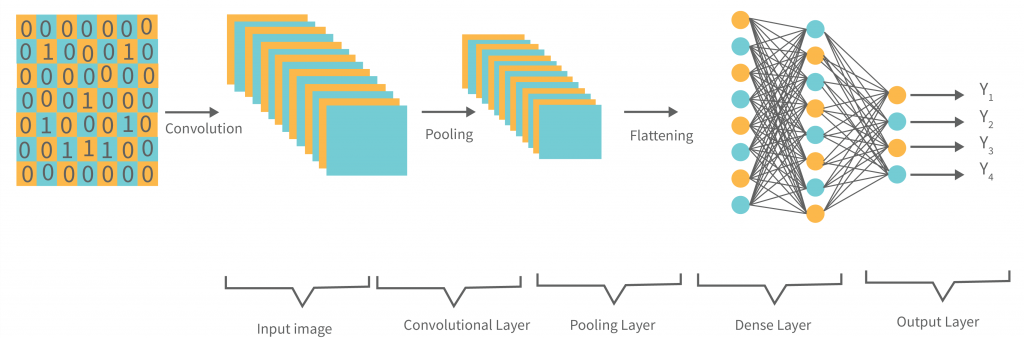

# Data Processing

Começamos por tratar os dados antes da classificação.

O dataset dos dígitos é bastante conhecido e está disponível nas bibliotecas importadas, por isso começamos por carregar o dataset, e dividi-lo em treino, teste e validação.

In [ ]:

# Carregar o dataset a partir do Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Usar 20% dos dados de treino para validação
x_train, x_validation, y_train, y_validation = train_test_split(
    x_train, y_train, test_size=0.2, random_state=69
)

print(f"Images have shape {x_train.shape[1:]}")

print(f"We have {x_train.shape[0]} images of size {x_train.shape[1]}x{x_train.shape[2]} for training!")

print(f"We have {x_validation.shape[0]} images of size {x_validation.shape[1]}x{x_validation.shape[2]} for validation!")

print(f"We have {x_test.shape[0]} images of size {x_test.shape[1]}x{x_test.shape[2]} for testing!")


# check amount of data per classin train and validation sets
print(f"Train data has:")
for i in range(10):
    print(f"\t • {i}: {np.sum(y_train == i)}")


print(f"Validation data has:")
for i in range(10):
    print(f"\t • {i}: {np.sum(y_validation == i)}")



Images have shape (28, 28)
We have 48000 images of size 28x28 for training!
We have 12000 images of size 28x28 for validation!
We have 10000 images of size 28x28 for testing!
Train data has:
	 • 0: 4756
	 • 1: 5461
	 • 2: 4754
	 • 3: 4898
	 • 4: 4624
	 • 5: 4349
	 • 6: 4773
	 • 7: 5015
	 • 8: 4663
	 • 9: 4707
Validation data has:
	 • 0: 1167
	 • 1: 1281
	 • 2: 1204
	 • 3: 1233
	 • 4: 1218
	 • 5: 1072
	 • 6: 1145
	 • 7: 1250
	 • 8: 1188
	 • 9: 1242


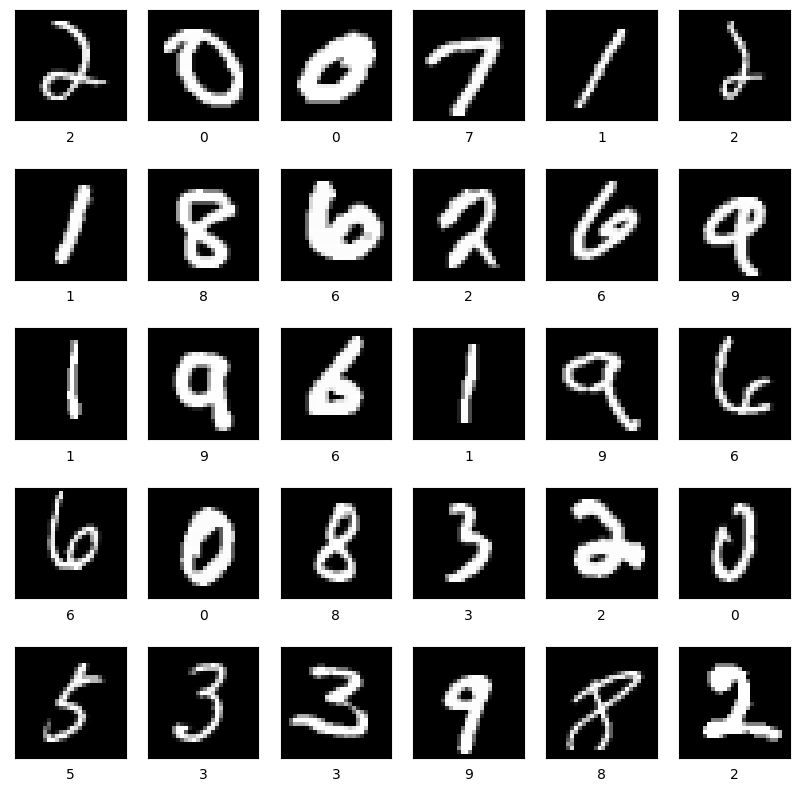

In [ ]:
#Usar a função auxiliar para mostrar algumas imagens
showImages(x_train, y_train, 10)

### One-Hot enconding

In [ ]:
print(f"Primeiro label: {y_train[0]}")

Primeiro label: 0


O dataset inclui os labels de cada imagem como números entre 0 e 9, para uma associação direta, chamados de dados categóricos. 

Vários algoritmos de Machine Learning não funcionam com este tipo de dados, usam dados no formato "One-hot". Neste formato cada label é representado como um array com N elementos, se houver N classes. Todos os elementos desse array serão 0 à exceção do índice que corresponde à classe certa.

In [ ]:
# Converter os labels para one-hot encoding
# y_train = ...
# y_validation = ...
# y_test = ...
print(f"first label: {y_train[0]}")

first label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Ou seja, a primeira imagem será o dígito 0 pois apenas no índice 0 do array está o valor 1.

### Normalização

É necessario normalizar todas as imagens e manter a coerência das shapes de todas as variáveis, para que a rede consiga treinar e fazer previsões

In [ ]:
input_shape = (28, 28, 1)

# Todas as imagens de treino, teste e validação vão ter a mesma dimensão
# x_train = ...
# x_test = ...
# x_validation = ...

# Ter a certeza que todos os dados são floats
x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')
x_test = x_test.astype('float32')

# Normalizar os dados para ficarem entre 0 e 1
# x_train ... 
# x_validation ... 
# x_test ... 

print('x_train shape:', x_train.shape)

x_train shape: (48000, 28, 28, 1)


# Training

Criar o modelo e treina-lo com os dados de treino

In [ ]:
# Parâmetros usados durante o treino
batch_size = 128 # Indica quantos exemplos de treino serão usados em cada iteração
num_classes = 10 # Número de classes possíveis
epochs = 10 # Número de iterações de treino

In [ ]:
model = Sequential()
#Adicionar camadas de convolução aqui
#model.add

Criamos 2 camadas de convolução, seguidas de camadas de maxpooling. 

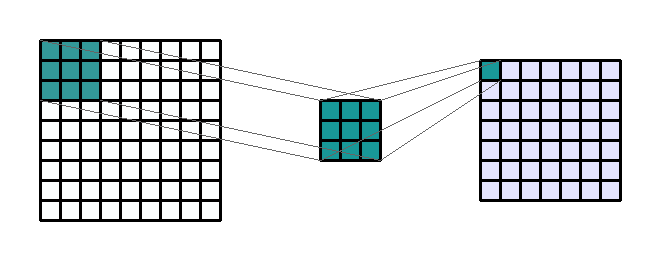

Na imagem o filtro usado é de 3x3.

In [ ]:
#Adicionar camadas de classificação aqui
#model.add(Dense ... )

Criamos uma rede completamente ligada para fazer a classificação depois da extração das características.

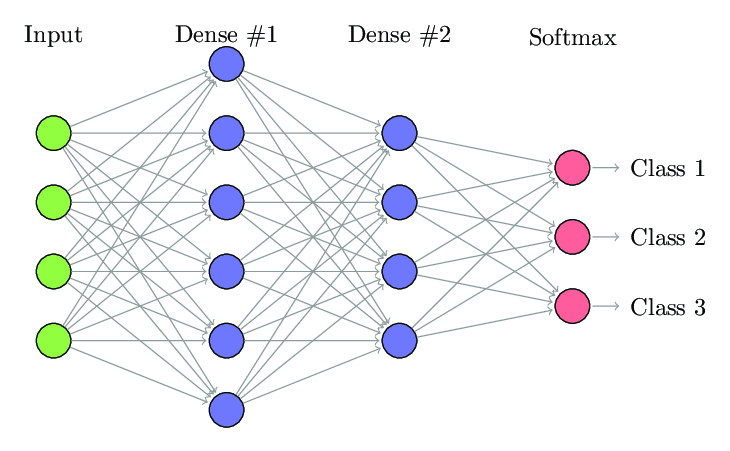

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_12 (Dense)            (None, 64)               

In [ ]:
# Criar o modelo, escolhemos o otimizador, a função de perda e as métricas a usar
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=['accuracy'])

In [ ]:
# Treinar o modelo, usando os dados de treino e validação, bem como os parametros que definimos anteriormente (epochs e batch_size) 
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_validation, y_validation))

Epoch 1/10
375/375 [==============================] - 19s 50ms/step - loss: 0.6830 - accuracy: 0.7707 - val_loss: 0.1015 - val_accuracy: 0.9697
Epoch 2/10
375/375 [==============================] - 17s 44ms/step - loss: 0.2570 - accuracy: 0.9261 - val_loss: 0.0664 - val_accuracy: 0.9809
Epoch 3/10
375/375 [==============================] - 17s 45ms/step - loss: 0.1898 - accuracy: 0.9445 - val_loss: 0.0604 - val_accuracy: 0.9841
Epoch 4/10
375/375 [==============================] - 19s 52ms/step - loss: 0.1518 - accuracy: 0.9567 - val_loss: 0.0585 - val_accuracy: 0.9858
Epoch 5/10
375/375 [==============================] - 18s 49ms/step - loss: 0.1341 - accuracy: 0.9632 - val_loss: 0.0530 - val_accuracy: 0.9865
Epoch 6/10
375/375 [==============================] - 20s 52ms/step - loss: 0.1172 - accuracy: 0.9671 - val_loss: 0.0627 - val_accuracy: 0.9856
Epoch 7/10
375/375 [==============================] - 24s 63ms/step - loss: 0.1089 - accuracy: 0.9682 - val_loss: 0.0493 - val_accuracy:

# Visualizar os resultados

Validation: acc is 99.08% and loss is 0.045


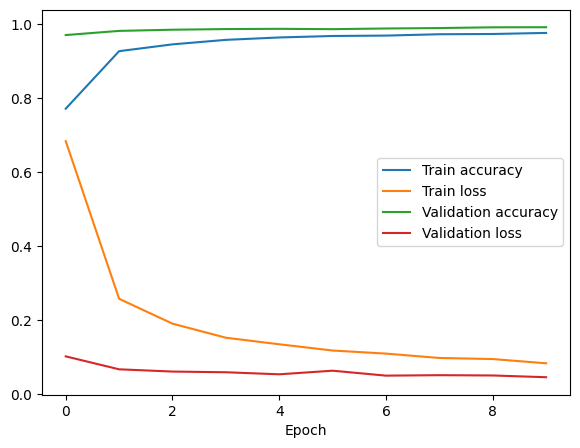

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train accuracy")
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epoch")
plt.legend(loc="best")

validation_loss, validation_acc = model.evaluate(x_validation, y_validation, verbose=False)

print(f"Validation: acc is {validation_acc*100:.2f}% and loss is {validation_loss:.3f}")

Ver algumas métricas ao longo de cada iteracão, observamos que a loss durante o treino vai diminuindo e que a accuracy aumenta, o mesmo acontece com os dados de validação, sugerindo que o modelo está a aprender e a "acertar" as classificações de cada imagem.

### Avaliar a performance do modelo

Avaliar quão bem o modelo se comporta quando tenta classificar dados nunca vistos durante o treino

In [ ]:
# score = ....

print(f'Test loss: {score[0]:.3f}')
print(f'Test accuracy: {score[1]*100:.2f}%')

Test loss: 0.036
Test accuracy: 99.11%


313/313 [==============================] - 2s 6ms/step


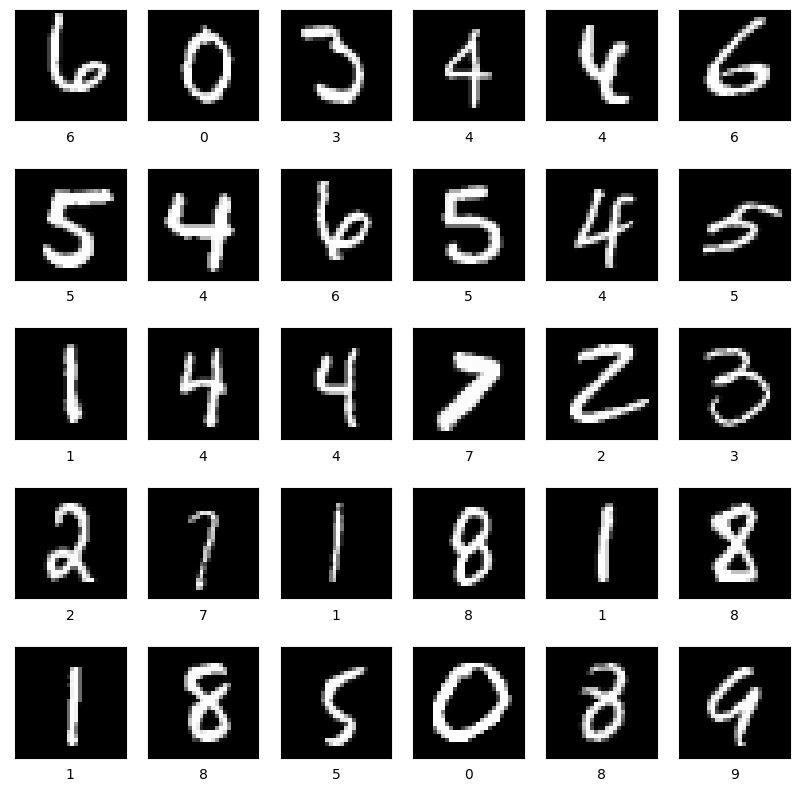

In [ ]:
#Visualizar as previsões do modelo

# predictions = ....

# Usando outra vez a função auxiliar
showImages(x_test.reshape(x_test.shape[0], 28, 28), predictions, 156)

Podemos ainda usar o modelo criado para classificar imagens desenhadas por nós

In [ ]:
# Carregar a imagem e converter para escala de cinzentos e para um tamanho 28x28
image = PIL.Image.open("myDigit.png").convert("L").resize((28, 28))

image_array = np.asarray(image)

# As imagens têm de ser invertidas para que o fundo seja preto e o número branco, para ficar igual ao dataset
image_array = 1 - (image_array.reshape(1, 28, 28, 1) / 255)
# image_array = (image_array.reshape(1, 28, 28, 1) / 255)

# Fazer a previsão
predicted = model.predict(image_array, verbose=0)

# E mostrar a imagem
plt.imshow(image_array[0].reshape(28,28), cmap="gray")
class_names = [str(i) for i in range(10)]
print(f"That is the digit {class_names[int(np.argmax(predicted))]} and I'm {np.max(predicted)*100:.2f}% sure of it")

NameError: ignored